<a href="https://colab.research.google.com/github/ctruciosm/ACA124/blob/main/Problema_Caminho_Mais_Curto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema do Caminho mais Curto

- Considere uma rede conectada e não direcionada com um nó de origem e um nó escoadouro.
- Considere também que os arcos representam a distância entre dois nós
- O objetivo do **problema do caminho mais curto** (ou **problema do menor caminho**) é encontrar o caminho da origem até o escoadouro que tenha a menor distância.

## Caso de estudo:

O "Mercado Free" deve entregar uma grande quantidade de produtos na cidade de _Tangamandapio_ (cidade 6). O Deposito com todos os produtos necessários para envío esta localizado na cidade de _Huacho_ (cidade 1). "Mercado Free" quer saber qual o caminho que o caminhão deve fazer para minimizar a distância total percorrida. O mapa rodoviário da região junto com as distâncias é apresentado a seguir.

![](https://raw.githubusercontent.com/ctruciosm/ACA124/main/tangamandapio.png)

As variáveis de decisão serão $X_{ij}$ indicando o trecho da cidade $i$ para a cidade $j$. Se o valor for 1, significa que esse trecho deve ser percorrido, se for 0, significa que esse trecho não deve ser percorrido. Assim, o problema a ser resolvido pode ser escrito como:

$$\text{Min. } \quad Z = 41 X_{12} + 44 X_{13} + 50X_{15} + 37 X_{24} + 27X_{35} + 45 X_{46} + 4X_{56},$$

sujeito às restrições:

- $X_{12} + X_{13} + X_{15} = 1,$ (nó 1)
- $X_{12} - X_{24} = 0,$  (nó 2)
- $X_{13} - X_{35} = 0,$  (nó 3)
- $X_{24} - X_{46} = 0,$  (nó 4)
- $X_{15} + X_{35} - X_{56} = 0,$  (nó 5)
- $X_{46} + X_{56} = 1.$  (nó 6)

In [1]:
C = c(41, 44, 50, 37, 27, 45, 4)
b = c(1, 0, 0, 0, 1)
A = matrix(c(1, 1, 1, 0, 0, 0, 0, 
             1, 0, 0, -1, 0, 0, 0, 
             0, 1, 0, 0, -1, 0, 0, 
             0, 0, 1, 0, 1, 0, -1, 
             0, 0, 0, 0, 0, 1, 1), ncol = 7, byrow = TRUE)
A

1,1,1,0,0,0,0
1,0,0,-1,0,0,0
0,1,0,0,-1,0,0
0,0,1,0,1,0,-1
0,0,0,0,0,1,1


In [2]:
install.packages("lpSolve")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(lpSolve)
resultado = lp("min", C, A, rep("=",5), b)
resultado$solution
resultado

[1] 0 0 1 0 0 0 1

Success: the objective function is 54 

## Algoritmo alternativo

Embora o método simplex seja capaz de resolver o problema, escrever as restrições funcionáis pode não ser tão simples. Um outro algoritmo, bastante intuitivo e simples (contudo, computacionalmente mais caro) poderia também ser utilizado.

Suponhamos que para algum $n$ ($n= 1, 2, \cdots $), conhecemos quais os  $n-1$ nós perto da origem com menor distância.

- **Objetivo:** Encontrar o nó mais próximos da origem.
- **Parâmetros de entrada:** $n-1$ nós mais próximo da origem (obtidos nos passos anteriores). Esses nós recebem o nome de **nós solucionados**, os demais são chamados de nós não solucionados.
- **Candidatos para nó mais próximo:** Cada nó solucionado  (que é conectado diretamente por um arco a um ou mais nós não solucionados) fornece um candidato (o nó não solucionado com o ligação mais curta).
- **Cálculo do nó mais próximo:** Para cada nó solucionado e seu candidato, acrescente a dist[ancia entre eles e a distância do caminho mais curto da origem até esse nó solucionado. O candidato com menor distância total é o $n$-ésimo nó mais próximo 

| n | Nós solucionados  | Nó candidato  | Distância Total | N-ésimo nó mais perto| Distância mínima | última conexao |
|:---:|:----------------:|:---------:|:----------:|:----------:|:----------:|:-----------:|
| 1 |   1     |   2      | 41km  | 2  | 41km  | "12" |
| 2 |  1, 2   | 3, 4     | 44km, 78km  | 3 | 44km | "13" |
| 3 | 1, 2, 3 | 5, 4, 5  | 50km, 78km, 71km  | 5 | 50km | "15" |
| 4 | 2, 5    | 4, 6     | 78km, 54km | 6 | 54km | "56" |


Caminho: 1 --> 5 --> 6

## R


In [4]:
install.packages("igraph")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
library(igraph)
# Escrevemos as distâncias entre os nós
E = rbind(c("1", "2", 41), 
          c("1", "5", 50), 
          c("1", "3", 44), 
          c("3", "5", 27),
          c("2", "4", 37),
          c("5", "6", 4),
          c("4", "6", 45))
colnames(E) = c("from", "to", "weight")  # "weight" é o único nome que deve aparecer exatamente como escrito aqui. Weights serao as distancias no nosso caso.
rede = data.frame(E)
rede


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




from,to,weight
<chr>,<chr>,<chr>
1,2,41
1,5,50
1,3,44
3,5,27
2,4,37
5,6,4
4,6,45


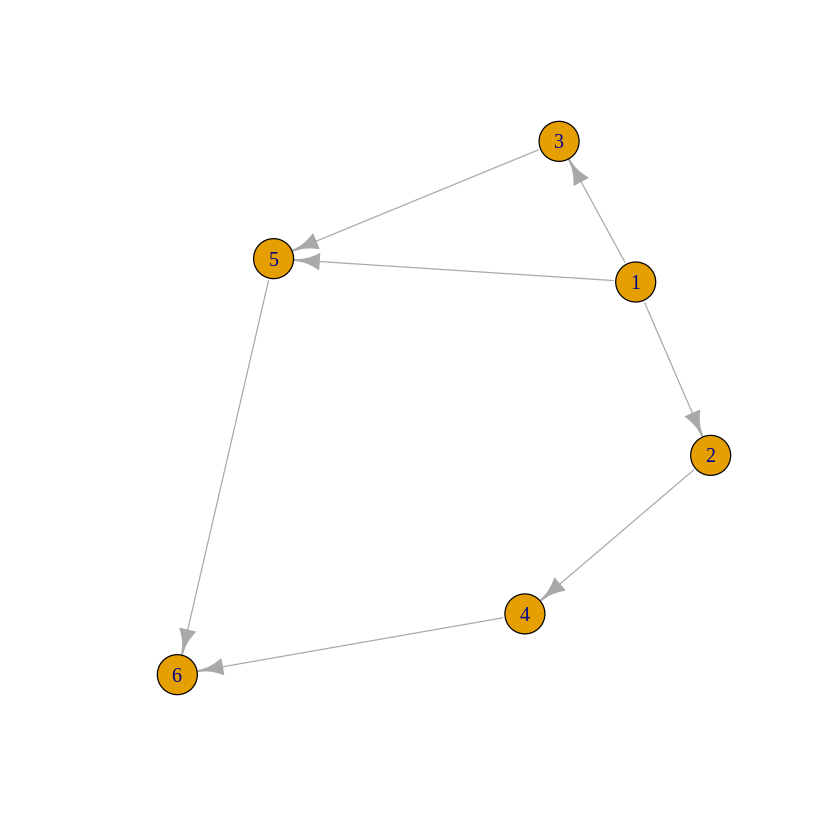

In [6]:
g = graph_from_data_frame(rede)
plot(g)

In [7]:
resultados = get.shortest.paths(g, from = V(g)["1"], to = V(g)["6"])
resultados$vpath

[[1]]
+ 3/6 vertices, named, from 0ca8c4a:
[1] 1 5 6


In [8]:
distances(g, v = V(g)["1"], to = V(g)["6"])

,6
1,54


> Se for utilizar o método simplex, precisa escrever corretamente o modelo matemático (função objetivo e restrições funcionais) o que pode não ser tão trivial. Se for utilizar o algoritmo alternativo, deve se atentar a escrever corretamente as conexões entre os nós (o que requer bastante cuidado e atenção).

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



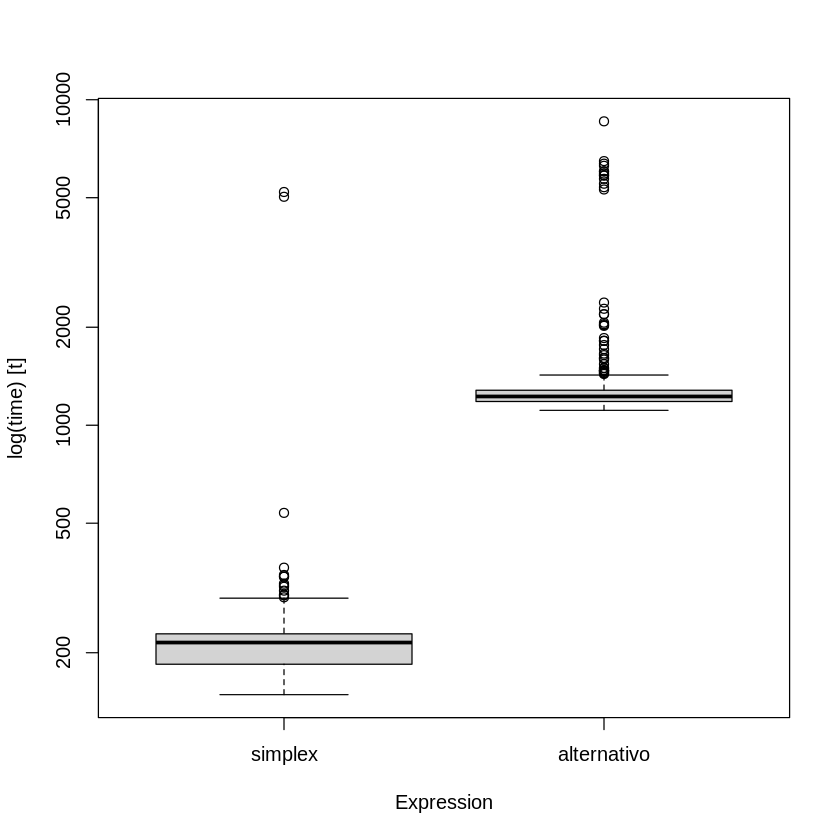

In [9]:
install.packages("microbenchmark")
library(microbenchmark)
comparar = microbenchmark(simplex = lp("min", C, A, rep("=",5), b),
                          alternativo = get.shortest.paths(g, from = V(g)["1"], to = V(g)["6"]),
                          times = 1000L) 
boxplot(comparar)


## Caso de estudo 2:

A administração de um parque temático precisa encontrar o caminho mais curto da entrada do parque (nó "O") até a vista panorâmica (nó "T") através de um sistema viário (ver Figura). Utilizaremos o algoritmo anterior para entender como obter o caminho mais curto.

![](https://raw.githubusercontent.com/ctruciosm/ACA124/main/caminho_curto.png)

| n | Nós solucionados  | Nó candidato  | Distância Total | N-ésimo nó mais perto| Distância mínima | última conexao |
|:---:|:----------------:|:---------:|:----------:|:----------:|:----------:|:-----------:|
| 1  |   O    |   A  | 2  | A  | 2  | OA |
| 2,3 |  O, A | C, B  | 4, 4  | C, B, | 4, 4 | OC, AB |
| 4  | A, B, C | D, E, E  | 9, 7, 8  | E | 7 | BE |
|  5 | A, B, E | D, D, D | 9, 8, 8 | D, D | 8, 8 |BD, ED|
| 6 | D, E | T, T | 13, 14 | T | 13 | DT



## R

In [10]:
library(igraph)
# Escrevemos as distâncias entre os nós
E = rbind(c("O", "A", 2), 
          c("O", "B", 5), 
          c("O", "C", 4), 
          c("A", "D", 7),
          c("A", "B", 2),
          c("B", "E", 3),
          c("B", "D", 4),
          c("C", "B", 1),
          c("C", "E", 4),
          c("D", "T", 5),
          c("E", "T", 7))
colnames(E) = c("from", "to", "weight")  # "weight" é o único nome que deve aparecer exatamente como escrito aqui. Weights serao as distancias no nosso caso.
rede = data.frame(E)
rede



from,to,weight
<chr>,<chr>,<chr>
O,A,2
O,B,5
O,C,4
A,D,7
A,B,2
B,E,3
B,D,4
C,B,1
C,E,4


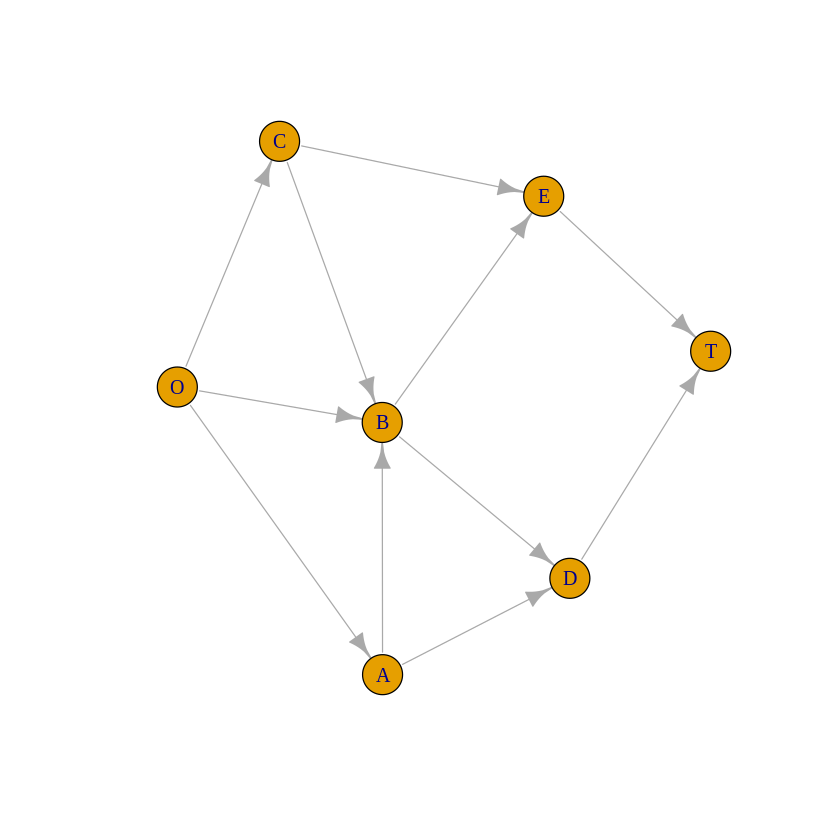

In [11]:
g = graph_from_data_frame(rede)
plot(g)

In [12]:
resultados = get.shortest.paths(g, from = V(g)["O"], to = V(g)["T"])
resultados$vpath

[[1]]
+ 5/7 vertices, named, from 6ef3549:
[1] O A B D T


In [13]:
distances(g, v = V(g)["O"], to = V(g)["T"])

,T
O,13


In [14]:
distances(g)

,O,A,B,C,D,E,T
O,0,2,4,4,8,7,13
A,2,0,2,3,6,5,11
B,4,2,0,1,4,3,9
C,4,3,1,0,5,4,10
D,8,6,4,5,0,7,5
E,7,5,3,4,7,0,7
T,13,11,9,10,5,7,0


## Outras aplicações

O problema do caminho mais curto não se restringe apenas a caminhos mais curtos. Ele pode ser utilizado em diversas aplicações, como por exemplo:

- Minimizar a **distância** total percorrida (como visto aqui).
- Minimizar o **custo** total de uma sequência de atividades.
- Minimizar o **tempo** total de uma sequência de atividades.